# 🧪 DataLoader Sanity Check

In this notebook, we will **test the PyTorch DataLoader** created in the `src.preprocessing` module to ensure:
- The dataset is loading correctly from `data/processed/`
- The DataLoader returns batches of image tensors and labels
- The class names are mapped properly
- The data can be visualized (for sanity checking transforms and normalization)

> ✅ This step is important before training — to confirm your dataset and preprocessing pipeline work as expected.

In [1]:
# 1️⃣ Setup
# -------------------------------------------------------------------
# Import required libraries
import sys, os
import matplotlib.pyplot as plt

# Add project root to Python path (so "src" can be imported)
sys.path.append(os.path.abspath(".."))

# Import the data loading function
from src.preprocessing import create_dataloaders

/Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <9B280146-BBD7-3F77-9873-F9740F2A5329> /Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <5A0957F2-80CF-3629-BC6F-6F0BEDCB77B0> /Users/macbook/opt/anaconda3/envs/BIA/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
# 2️⃣ Create Dataloaders
# -------------------------------------------------------------------
# Create train, validation, and test dataloaders
# The function returns loaders + the list of class names
train_loader, val_loader, test_loader, class_names = create_dataloaders("../data/processed")

# Print basic info for sanity check
print(f"Classes found: {class_names}")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

✅ Datasets ready: 15150 train, 4881 val, 2526 test
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Classes found: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Training batches: 474
Validation batches: 153
Test batches: 79


/Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <9B280146-BBD7-3F77-9873-F9740F2A5329> /Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <5A0957F2-80CF-3629-BC6F-6F0BEDCB77B0> /Users/macbook/opt/anaconda3/envs/BIA/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/macbook/opt/anaconda3/envs/BIA/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/macbook/op

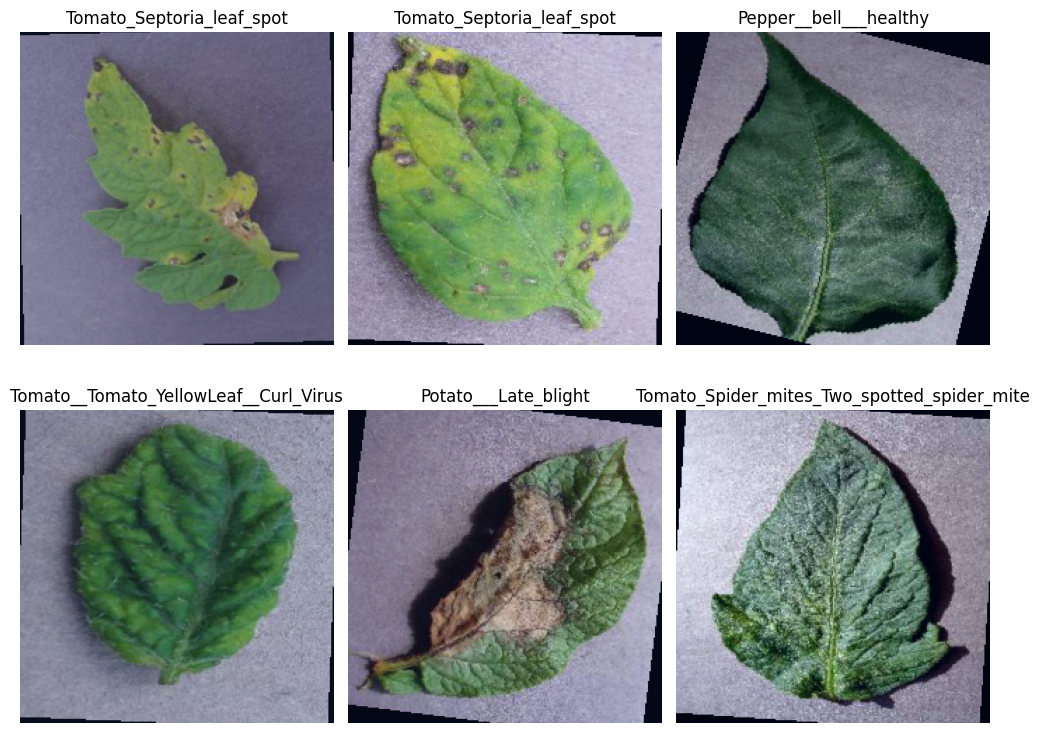

In [4]:
# 3️⃣ Visualize a Few Sample Images
# -------------------------------------------------------------------
# Get a single batch of images and labels
images, labels = next(iter(train_loader))

# Create a figure to visualize a few samples
plt.figure(figsize=(10, 8))

# Loop through the first 6 images
for i in range(6):
    img = images[i].permute(1, 2, 0)  # Convert from [C, H, W] → [H, W, C]
    img = img * 0.229 + 0.485         # Roughly unnormalize (optional visualization step)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

### ✅ Dataloader Verification Summary

The dataloader test was **successfully completed**.  
We confirmed that:

- The dataset was correctly split into **train**, **validation**, and **test** sets.  
- All class folders were properly recognized by `torchvision.datasets.ImageFolder`.  
- The `create_dataloaders()` function returned valid PyTorch dataloaders and class labels.  
- A sample batch visualization verified that images are correctly **loaded, transformed, and labeled**.  

This confirms that the **preprocessing pipeline and dataloader** are both functioning as expected — ready for model training. 🚀